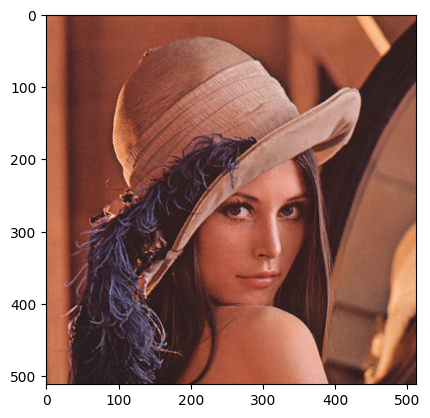

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


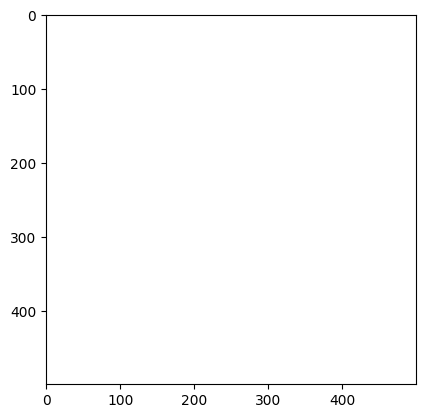

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

def bilinear_resize(image, height, width):
  """
  `image` is a 2-D numpy array
  `height` and `width` are the desired spatial dimension of the new 2-D array.
  """
  img_height, img_width = image.shape[:2]

  resized = np.empty([height, width])

  x_ratio = float(img_width - 1) / (width - 1) if width > 1 else 0
  y_ratio = float(img_height - 1) / (height - 1) if height > 1 else 0

  for i in range(height):
    for j in range(width):

      x_l, y_l = math.floor(x_ratio * j), math.floor(y_ratio * i)
      x_h, y_h = math.ceil(x_ratio * j), math.ceil(y_ratio * i)

      x_weight = (x_ratio * j) - x_l
      y_weight = (y_ratio * i) - y_l

      a = image[y_l, x_l]
      b = image[y_l, x_h]
      c = image[y_h, x_l]
      d = image[y_h, x_h]

      pixel = a * (1 - x_weight) * (1 - y_weight)  + b * x_weight * (1 - y_weight) +c * y_weight * (1 - x_weight) + d * x_weight * y_weight
      resized[i][j] = math.floor(pixel)

  return resized







image = cv2.imread('lena_color.jpg', 1)
b, g, r = cv2.split(image)
rgb_image = cv2.merge((r, g, b))
plt.imshow(rgb_image)
plt.show()


height=500
width=500



#img=np.array(b)
newb=bilinear_resize(b, height,width)
#img=np.array(g)
newg=bilinear_resize(g, height,width)
#img=np.array(r)
newr=bilinear_resize(r, height,width)
rgb_image = cv2.merge((newr, newg, newb))
plt.imshow(rgb_image)
plt.show()

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

def bilinear_resize(image, height, width):
  """
  `image` is a 2-D numpy array
  `height` and `width` are the desired spatial dimension of the new 2-D array.
  """
  img_height, img_width = image.shape[:2]

  resized = np.empty([height, width])

  x_ratio = float(img_width - 1) / (width - 1) if width > 1 else 0
  y_ratio = float(img_height - 1) / (height - 1) if height > 1 else 0

  for i in range(height):
    for j in range(width):

      x_l, y_l = math.floor(x_ratio * j), math.floor(y_ratio * i)
      x_h, y_h = math.ceil(x_ratio * j), math.ceil(y_ratio * i)

      x_weight = (x_ratio * j) - x_l
      y_weight = (y_ratio * i) - y_l

      a = image[y_l, x_l]
      b = image[y_l, x_h]
      c = image[y_h, x_l]
      d = image[y_h, x_h]

      pixel = a * (1 - x_weight) * (1 - y_weight)  + b * x_weight * (1 - y_weight) +c * y_weight * (1 - x_weight) + d * x_weight * y_weight
      resized[i][j] = pixel

  return resized

img = np.array([[1 ,10 ,3] ,[3,50,6]])
newimg=bilinear_resize(img, 4,4)
print(newimg)

[[ 1.          7.          7.66666667  3.        ]
 [ 1.66666667 16.11111111 16.88888889  4.        ]
 [ 2.33333333 25.22222222 26.11111111  5.        ]
 [ 3.         34.33333333 35.33333333  6.        ]]
